In [1]:
import pandas as pd

df = pd.read_csv('olist_order_reviews_dataset.csv', index_col='review_id')

df.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
review_id,,,,,,
7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt

unique_review_score = df['review_score'].value_counts()

print(unique_review_score)

index = sorted(df['review_score'].unique())
frequence = [unique_review_score.at[x] for x in index]
bar_width = 0.35

plt.bar(index, frequence, bar_width)
plt.title('Frequence of scores of the dataset')
plt.ylabel('Frequence')
plt.xlabel('Score')
plt.show()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64


<Figure size 640x480 with 1 Axes>

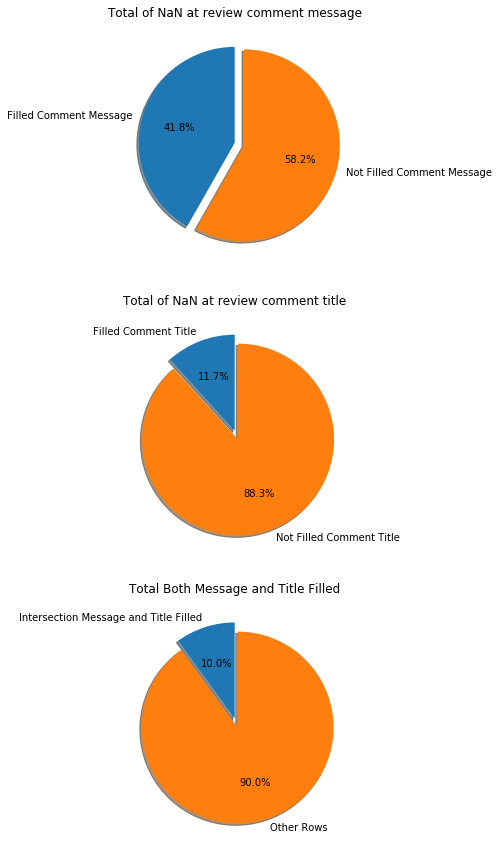

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Calculus of the number of sample of interest
total_rows = df.shape[0]
total_comments_message = df['review_comment_message'].count()
total_comments_title = df['review_comment_title'].count()
total_filled_message_and_title = df.loc[np.logical_not(df.review_comment_title.isna() | df.review_comment_message.isna())].shape[0]

# Preparing labels and values to the ploted
labels_comment_message = ['Filled Comment Message', 'Not Filled Comment Message']
sizes_comment_message = [total_comments_message, total_rows - total_comments_message]

labels_comment_title = ['Filled Comment Title', 'Not Filled Comment Title']
sizes_comment_title = [total_comments_title, total_rows - total_comments_title]

labels_message_and_title = ['Intersection Message and Title Filled', 'Other Rows']
sizes_message_and_title = [total_filled_message_and_title, total_rows - total_filled_message_and_title]
explode = [0, 0.1]

# Plot the 3 pie charts
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
plt.title('Total of NaN at review comment message')
plt.pie(sizes_comment_message, explode=explode, labels=labels_comment_message, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.subplot(3, 1, 2)
plt.title('Total of NaN at review comment title')
plt.pie(sizes_comment_title, explode=explode, labels=labels_comment_title, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.subplot(3, 1, 3)
plt.title('Total Both Message and Title Filled')
plt.pie(sizes_message_and_title, explode=explode, labels=labels_message_and_title, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

# Cleaning the Data

In [4]:
from nltk.corpus import stopwords

stop_words = stopwords.words('portuguese')
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos

In [5]:
import unicodedata
from nltk.tokenize import RegexpTokenizer


df.dropna(subset=['review_comment_message'], inplace=True)

print(df.shape)

def clean_data(input_str):
    input_str = input_str.lower()
    input_str = remove_accent(input_str)
    input_str = remove_stopwords(input_str)
    input_str = remove_punctuation(input_str)
    
    return input_str

def remove_stopwords(string):
    result_string = []
    
    for letter in string.split():
        result_string.append(letter) if letter not in stop_words else None
        
    return " ".join(result_string)

def remove_punctuation(string):
    tokenizer = RegexpTokenizer(r'\w+')
    result_string = tokenizer.tokenize(string)
    return " ".join(result_string)

def remove_accent(string):
    nfkd_form = unicodedata.normalize('NFKD', string)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

df['cleaned_comment_message'] = df['review_comment_message'].apply(clean_data)

for i in range(20):
    print(df['review_comment_message'][i])
    print(df['cleaned_comment_message'][i])
    print()

(41753, 6)
Recebi bem antes do prazo estipulado.
recebi bem antes prazo estipulado

Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa
parabens lojas lannister adorei comprar internet seguro pratico parabens todos feliz pascoa

aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho
aparelho eficiente site marca aparelho impresso 3desinfector chegar outro nome atualizar marca correta vez aparelho

Mas um pouco ,travando...pelo valor ta Boa.

pouco travando pelo valor ta boa

Vendedor confiável, produto ok e entrega antes do prazo.
vendedor confiavel produto ok entrega antes prazo

GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E ESSA COMPRA AGORA ME DECPCIONOU
gostaria saber houve sempre recebi compra agora decpcionou

Péssimo
pessimo

Loja nota 10
loja nota 10

obrigado pela atençao amim dispensada
obrigado atencao amim 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

target = df['review_score'].values
data = df['cleaned_comment_message'].values

cv = CountVectorizer()
cv.fit(data)
data = cv.transform(data)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.35, random_state=42
)

#for c in [0.01, 0.05, 0.25, 0.5, 1]:

c = 0.05
lr = LogisticRegression(C=c, solver='lbfgs', multi_class='auto')
lr.fit(X_train, y_train)
print ("Accuracy for C=%s: %s" % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.05: 0.6755850554263035
